Today we would go through 3 parts: 
- A quick review for predictive analysis pipeline
- Pandas crash course
- Example: descriptive and predictive analysis using linear regression

# A quick review for predictive analysis pipeline
----
Let's review our Article example
- Define the goal, task
- Data preprocessing
- Explanatory data analysis
- Feature engineering
- Modeling
- Performance evaluation

# Pandas crash course
----

As mentioned, pandas is a package for processing tabular data in Python. If you had once using R, you probably will find some similiar syntax.
This part helps you know the basic operation for pandas. It might be a little boring but this makes you have basic understanding of processing your data. 

Before we get start, I'd like to remind you pandas is just a package. We are learning the operations we can do on data set.

## Series

- A series is like a vector.
- Series can have axis labels, meaning it can be indexed by a label, instead of just a number location.
- It also doesn't need to hold numeric data, it can hold any arbitrary Python Object.

### Creation

In [1]:
import numpy as np
import pandas as pd

In [2]:
labels = ['a','b','c']
my_list = [10,20,30]

In [3]:
pd.Series(my_list)

0    10
1    20
2    30
dtype: int64

In [4]:
pd.Series(my_list,index=labels)

a    10
b    20
c    30
dtype: int64

In [5]:
pd.Series(labels)

0    a
1    b
2    c
dtype: object

In [6]:
# Even functions (although unlikely that you will use this)
pd.Series([sum,print,len])

0      <built-in function sum>
1    <built-in function print>
2      <built-in function len>
dtype: object

### Indexing
You could select your data by index or label

In [7]:
ser1 = pd.Series([1,2,3,4],index = ['USA', 'Germany','USSR', 'Japan'])                                   

In [8]:
ser1

USA        1
Germany    2
USSR       3
Japan      4
dtype: int64

In [9]:
# ser1.iloc[0]
# or
# ser1.iloc[[0]]
# or
# ser1[0]

1

In [11]:
ser1.iloc[0:3]
# or
# ser1.iloc[[0,2]]

USA        1
Germany    2
USSR       3
dtype: int64

In [ ]:
# ser1.iloc[[0:3]]   # error

In [10]:
ser1.loc['USA']
# or
# ser1.loc[['USA']]
# or
# ser1['USA']


1

In [ ]:
# iloc -> index number
# loc -> label

In [12]:
ser1.loc[['USA','USSR']]

USA     1
USSR    3
dtype: int64

In [ ]:
# ser1.loc['USA','USSR'] # error

### Operation
Elementwise and broadcast

In [13]:
ser1 + ser1 # elementwise

USA        2
Germany    4
USSR       6
Japan      8
dtype: int64

In [14]:
ser1 * ser1

USA         1
Germany     4
USSR        9
Japan      16
dtype: int64

In [ ]:
# ser1 + [1,2] # error

In [ ]:
ser1 + 1 # broadcast

In [ ]:
# ser1 and True # error

In [ ]:
ser1 & True # broadcast

In [ ]:
ser1

In [ ]:
ser2 = pd.Series([1,2,5,4],index = ['USA', 'Germany','Italy', 'Japan'])                                   

In [ ]:
ser2

In [ ]:
# Operations are then also done based off of index:
ser1 + ser2 

In [ ]:
ser3 = pd.Series([1,2,3,4])
ser3

In [ ]:
ser4 = pd.Series([2,3,4,5,6])
addser = ser4.iloc[1:5].reset_index(drop=  True)+ser3.reset_index(drop = True)

In [ ]:
addser

## DataFrames

- Very simliar to R dataframe
- We can think of a DataFrame as a bunch of Series objects put together to share the same index

In [ ]:
from numpy.random import randn
np.random.seed(101)
df = pd.DataFrame(randn(5,4),index='A B C D E'.split(),columns='W X Y Z'.split())
df

### Selection and Indexing

Let's learn the various methods to grab data from a DataFrame

In [ ]:
# df[0] # error

In [ ]:
# select a column by column label
df['W']
# or
# df.loc[:,'W']

In [ ]:
# select 2 columns by column label
df[['W','Z']]
# or
# df.loc[:,['W','Z']]

DataFrame Columns are just Series

In [ ]:
type(df['W'])

**Creating a new column:**

In [ ]:
df['new'] = df['W'] + df['Y']

In [ ]:
df

**Removing Columns**

In [ ]:
df.drop('new',axis='columns')

In [ ]:
# Not inplace unless specified!
df

In [ ]:
df.drop(['new'],axis='columns',inplace=True)

In [ ]:
df

Can also drop rows this way:

**Selecting Rows**

In [ ]:
df.loc['A']

Or select based off of position instead of label 

In [ ]:
df.iloc[1:3,-3:-1]

**Selecting subset of rows and columns**

In [ ]:
df.loc['B','Y']

In [ ]:
df.loc[['A','B'],['W','Y']]

### Conditional Selection

An important feature of pandas is conditional selection using bracket notation

In [ ]:
df

In [ ]:
df > 0

In [ ]:
df[df>0]

In [ ]:
# df.loc[ df>0 ]  # error

In [ ]:
df

In [ ]:
df['X']>0

In [ ]:
df[df['X']>0]
# or
# df.loc[df['X']>0]

In [ ]:
df[df['X']>0]['Y']

In [ ]:
df[df['W']>0][['Y','X']]

For two conditions you can use | and & with parenthesis:

In [ ]:
df

In [ ]:
df[ (df['W']>0) & (df['Y'] > 1) ]

### More Index Details
Let's discuss some more features of indexing, including resetting the index or setting it something else. 

In [ ]:
df

In [ ]:
# Reset to default 0,1...n index
df.reset_index()

In [ ]:
df['States'] = ['CA', 'NY', 'WY', 'OR', 'CO']

In [ ]:
df

In [ ]:
df.set_index('States')

In [ ]:
df

In [ ]:
df.set_index('States',inplace=True)

In [ ]:
df

In [ ]:
df.reset_index()

### (optional) Multi-Index and Index Hierarchy

Let us go over how to work with Multi-Index, first we'll create a quick example of what a Multi-Indexed DataFrame would look like:

In [ ]:
# Index Levels
outside = ['G1','G1','G1','G2','G2','G2']
inside = [1,2,3,1,2,3]
hier_index = list(zip(outside,inside))
hier_index = pd.MultiIndex.from_tuples(hier_index)

In [ ]:
hier_index

In [ ]:
df = pd.DataFrame(np.random.randn(6,2),index=hier_index,columns=['A','B'])
df

Now let's show how to index this! For index hierarchy we use df.loc[], if this was on the columns axis, you would just use normal bracket notation df[]. Calling one level of the index returns the sub-dataframe:

In [ ]:
df.loc['G1',1]

In [ ]:
df.loc['G1'].loc[1]

In [ ]:
df.index.names

In [ ]:
df.index.names = ['Group','Num']

In [ ]:
df

In [ ]:
df.xs('G1')

In [ ]:
df.xs(['G1',1])

In [ ]:
df.xs(1,level='Num')

## Missing Data
Let's show a few convenient methods to deal with Missing Data in pandas

In [ ]:
df = pd.DataFrame({'A':[1,2,np.nan],
                  'B':[5,np.nan,np.nan],
                  'C':[1,2,3]})

In [ ]:
df

In [ ]:
df.dropna()

In [ ]:
df.dropna(axis='columns')

In [ ]:
df.dropna(thresh=2)

In [ ]:
df.fillna(value='FILL VALUE')

In [ ]:
df['A'].fillna(value=df['A'].mean())

## Operations

In [ ]:
df = pd.DataFrame({'col1':[1,2,3,4],'col2':[444,555,666,444],'col3':['abc','def','ghi','xyz']})
df.head()

### Info on Unique Values

In [ ]:
df['col2'].unique()

In [ ]:
df['col2'].nunique()

In [ ]:
df['col2'].value_counts()

### Selecting Data

In [ ]:
#Select from DataFrame using criteria from multiple columns
newdf = df[(df['col1']>2) & (df['col2']==444)]

In [ ]:
newdf

### Applying Functions

In [ ]:
def times2(x):
    return x*2

In [ ]:
df['col1'].apply(times2)

In [ ]:
df['col1']

In [ ]:
def iswhatever(x):
    if x>2:
        return True
    elif x<=2 and x>1:
        return False
df['col1'].apply(iswhatever)

In [ ]:
df['col3'].apply(len)

In [ ]:
df['col1'].sum()

In [ ]:
df

In [ ]:
df[['col1','col2']].apply(sum,axis = 'columns')

**Get column and index names:**

In [ ]:
df.columns

In [ ]:
df.index

**Sorting and Ordering a DataFrame:**

In [ ]:
df

In [ ]:
df.sort_values(by='col2') #inplace=False by default

**Find Null Values or Check for Null Values**

In [ ]:
df.isnull()

In [ ]:
# Drop rows with NaN Values
df.dropna()

## Merging and Concatenating

In [15]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']},
                        index=[0, 1, 2, 3])
df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                        'B': ['B4', 'B5', 'B6', 'B7'],
                        'C': ['C4', 'C5', 'C6', 'C7'],
                        'D': ['D4', 'D5', 'D6', 'D7']},
                         index=[4, 5, 6, 7]) 
df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                        'B': ['B8', 'B9', 'B10', 'B11'],
                        'C': ['C8', 'C9', 'C10', 'C11'],
                        'D': ['D8', 'D9', 'D10', 'D11']},
                        index=[8, 9, 10, 11])

In [16]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [17]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [18]:
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


### Concatenation
Concatenation basically glues together DataFrames. Keep in mind that dimensions should match along the axis you are concatenating on. You can use **pd.concat** and pass in a list of DataFrames to concatenate together:

In [19]:
pd.concat([df1,df2,df3],axis = 'rows')

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [20]:
# would concat based on index
pd.concat([df1,df2,df3],axis='columns')

,A,B,C,D,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,A4,B4,C4,D4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,A5,B5,C5,D5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,A6,B6,C6,D6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,A7,B7,C7,D7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A8,B8,C8,D8
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A9,B9,C9,D9


In [ ]:
df1.reset_index(drop = True,inplace = True)
df2.reset_index(drop = True,inplace = True)
df3.reset_index(drop = True,inplace = True)
pd.concat([df1,df2,df3],axis='columns')

## Merging

The **merge** function allows you to merge DataFrames together using a similar logic as merging SQL Tables together. For example:

In [ ]:
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1'],
                        'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3']})
    
right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                               'key2': ['K0', 'K0', 'K0', 'K0'],
                                  'C': ['C0', 'C1', 'C2', 'C3'],
                                  'D': ['D0', 'D1', 'D2', 'D3']})

In [ ]:
left

In [ ]:
right

In [ ]:
pd.merge(left,right, on = 'key1')

In [ ]:
pd.merge(left, right, on=['key1', 'key2'])

In [ ]:
pd.merge(left, right, how='outer', on=['key1', 'key2'])

In [ ]:
pd.merge(left, right, how='right', on=['key1', 'key2'])

In [ ]:
pd.merge(left, right, how='left', on=['key1', 'key2'])

# Example: descriptive and predictive analysis using linear regression
---

Let's redo our `Article` example. We would use the most basic tool called linear regression to compare how descriptive goal and predictive goal different from each other. We would also go through more data processing details that we didn't cover last time. 

You would find out that data analysis every step has to match up each other to get things work!

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

Article = pd.read_csv("Article.csv")   # You may replace the path
Article['PostTime'] = pd.to_datetime(Article['PostTime'])

Article.head()

,ArticleID,ExpertID,CategoryID,Subject,Thumbnail,PostTime,ClickCount,ReadBook,CreateUserID,CreateUserName,CreateTime,ModifyUserID,ModifyUserName,ModifyTime,SubCategoryID,PlatformType,DeleteStatus
0,1,1,2,「16年的孤軍奮戰後，我才知道政府有提供失能者服務」照顧者榮雲霄的心情故事,2c838b8e-b4bf-4761-b190-1941ffe88202.jpg,2016-05-24,51089,NaN,NaN,NaN,NaN,1,系統管理員,2018-08-25 16:32:29.053,NaN,1,0
1,2,1,2,「媽媽，我沒有不要你！」將失智母親送到安養院，是我最好的選擇,e7f679dd-58c8-47e6-8d04-d08c82bcd6dd.jpg,2016-05-24,254452,NaN,NaN,NaN,NaN,1,系統管理員,2018-08-25 16:34:18.303,NaN,1,0
2,3,1,4,夾縫中求生存 三不管的「過動」失智老人,56fbcf2a-8b33-4069-8b23-2b16a9f4f71e.jpg,2016-05-24,32426,NaN,NaN,NaN,NaN,1,系統管理員,2018-08-25 16:35:19.977,NaN,1,0
3,4,5,4,什麼是壓傷(舊名壓瘡)？為什麼壓傷照顧不好可能造成病人死亡呢？,e99b1271-e0df-4197-af71-246a344d7d62.jpg,2016-05-24,34096,NaN,NaN,NaN,NaN,1,系統管理員,2018-08-25 16:37:26.053,NaN,1,0
4,5,2,2,你累了嗎？居家照護的十大壓力徵兆，檢視你中了幾項－諮商心理師 陳乃綾,2a2b2311-ad84-40cd-a926-2f13398c6da4.jpg,2016-05-24,35830,NaN,NaN,NaN,NaN,1,系統管理員,2018-08-25 16:39:14.710,NaN,1,0


In [2]:
Article.columns.values

array(['ArticleID', 'ExpertID', 'CategoryID', 'Subject', 'Thumbnail',
       'PostTime', 'ClickCount', 'ReadBook', 'CreateUserID',
       'CreateUserName', 'CreateTime', 'ModifyUserID', 'ModifyUserName',
       'ModifyTime', 'SubCategoryID', 'PlatformType', 'DeleteStatus'],
      dtype=object)

In [3]:
from ckiptagger import WS
model_path = "../../Src/" + "data"
ws = WS(model_path) # fill the diretory store the download model
word_sentence_list = ws(Article['Subject'])

concated_word_sentence_list = [" ".join(i) for i in word_sentence_list]
Article['concated_word_sentence_list'] = concated_word_sentence_list

Article['labenc_CreateUserName'] = pd.factorize(Article['CreateUserName'])[0]
# keep only non-deleted articles
Article = Article[Article['DeleteStatus']==0].reset_index(drop = True)
Article.drop(['ArticleID','Subject','Thumbnail','PostTime','DeleteStatus','ReadBook','CreateUserID','CreateUserName','ModifyUserName','CreateTime','ModifyTime','SubCategoryID'],axis ='columns',inplace = True)


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [4]:
# create a set of word embedding. this makes each word as a columns, you could skip this if you can't understand
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features = 40).fit(Article['concated_word_sentence_list'])

subjectword_df = pd.DataFrame(vectorizer.transform(Article['concated_word_sentence_list']).todense(),columns = ["subjectword_"+ i for i in vectorizer.get_feature_names()])

print(subjectword_df.shape)
print(Article.shape)
Article = pd.concat([Article.drop(['concated_word_sentence_list'],axis = 'columns'),
                     subjectword_df],axis = 'columns').fillna(0)
print(Article.shape)

(3428, 40)
(3428, 7)
(3428, 46)


In [5]:
Article.head()

,ExpertID,CategoryID,ClickCount,ModifyUserID,PlatformType,labenc_CreateUserName,subjectword_不要,subjectword_中風,subjectword_人生,subjectword_什麼,subjectword_健康,subjectword_可以,subjectword_失智,subjectword_失智症,subjectword_如何,subjectword_專欄,subjectword_彙整,subjectword_心理師,subjectword_怎麼,subjectword_患者,subjectword_我們,subjectword_新聞,subjectword_服務,subjectword_朱國鳳,subjectword_治療,subjectword_注意,subjectword_為什麼,subjectword_照護,subjectword_照顧,subjectword_父母,subjectword_生活,subjectword_老人,subjectword_自己,subjectword_輔具,subjectword_退休,subjectword_這樣,subjectword_運動,subjectword_醫師,subjectword_醫療,subjectword_重要,subjectword_長照,subjectword_長者,subjectword_長輩,subjectword_需要,subjectword_預防,subjectword_飲食
0,1,2,51089,1,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,2,254452,1,1,-1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,4,32426,1,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5,4,34096,1,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,2,35830,1,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Descriptive
Goal: What rise with/makes click count?

**Model:**  
clickcount = w0 + w1*ExpertID + w2 * CategoryID + w3 * subjectword_不要 + ...

In [6]:
X = Article.drop(['ClickCount'],axis = 'columns')
y = Article['ClickCount']

formula="ClickCount = "+" + ".join(X.columns.values)
print("Model: \n"+formula)
import statsmodels.formula.api as smf
model = smf.ols(formula, data = Article).fit()

Model: 
ClickCount ~ ExpertID + CategoryID + ModifyUserID + PlatformType + labenc_CreateUserName + subjectword_不要 + subjectword_中風 + subjectword_人生 + subjectword_什麼 + subjectword_健康 + subjectword_可以 + subjectword_失智 + subjectword_失智症 + subjectword_如何 + subjectword_專欄 + subjectword_彙整 + subjectword_心理師 + subjectword_怎麼 + subjectword_患者 + subjectword_我們 + subjectword_新聞 + subjectword_服務 + subjectword_朱國鳳 + subjectword_治療 + subjectword_注意 + subjectword_為什麼 + subjectword_照護 + subjectword_照顧 + subjectword_父母 + subjectword_生活 + subjectword_老人 + subjectword_自己 + subjectword_輔具 + subjectword_退休 + subjectword_這樣 + subjectword_運動 + subjectword_醫師 + subjectword_醫療 + subjectword_重要 + subjectword_長照 + subjectword_長者 + subjectword_長輩 + subjectword_需要 + subjectword_預防 + subjectword_飲食


In [7]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             ClickCount   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     12.05
Date:                Wed, 18 Dec 2019   Prob (F-statistic):           1.03e-77
Time:                        20:19:51   Log-Likelihood:                -39953.
No. Observations:                3428   AIC:                         8.000e+04
Df Residuals:                    3383   BIC:                         8.027e+04
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              7298.8704   1712.642      4.262      0.000    3940.951    1.07e+04
ExpertID                -52.0526     14.779     -3.522      0.000     -81.030     -23.075
CategoryID             1419.4634    335.705      4.228      0.000     761.259    2077.668
ModifyUserID          -1746.6680   3123.596     -0.559      0.576   -7870.994    4377.658
PlatformType           7298.8704   1712.642      4.262      0.000    3940.951    1.07e+04
labenc_CreateUserName -1.593e+04    976.640    -16.315      0.000   -1.78e+04    -1.4e+04
subjectword_不要         1.325e+04   3250.426      4.075      0.000    6873.335    1.96e+04
subjectword_中風         2709.4149   2537.997      1.068      0.286   -2266.748    7685.577
subjectword_人生        -3331.2342   2315.692     -1.439      0.150   -7871.532    1209.063
subjectword_什麼         9529.2156   2755.217      3.459      0.001    4127.156    1.49e+04
subjectword_健康        -4278.2089   2438.570     -1.754      0.079   -9059.428     503.011
subjectword_可以        -3470.1754   2514.846     -1.380      0.168   -8400.948    1460.597
subjectword_失智         1165.7875   1790.230      0.651      0.515   -2344.254    4675.829
subjectword_失智症        4683.2874   1842.988      2.541      0.011    1069.805    8296.770
subjectword_如何        -2740.2510   2667.696     -1.027      0.304   -7970.710    2490.208
subjectword_專欄        -3024.8420   3559.738     -0.850      0.396      -1e+04    3954.613
subjectword_彙整         1308.7626   2.02e+04      0.065      0.948   -3.84e+04     4.1e+04
subjectword_心理師       -2433.0607   3201.068     -0.760      0.447   -8709.284    3843.162
subjectword_怎麼         1812.5914   2581.173      0.702      0.483   -3248.225    6873.408
subjectword_患者        -6074.3623   3417.027     -1.778      0.076   -1.28e+04     625.285
subjectword_我們         2502.8624   3268.459      0.766      0.444   -3905.492    8911.217
subjectword_新聞        -1.727e+04      2e+04     -0.862      0.389   -5.65e+04     2.2e+04
subjectword_服務         6528.0156   2873.295      2.272      0.023     894.446    1.22e+04
subjectword_朱國鳳        1.209e+04   4377.474      2.763      0.006    3510.082    2.07e+04
subjectword_治療         -513.8119   2896.487     -0.177      0.859   -6192.854    5165.230
subjectword_注意        -1771.6729   2833.742     -0.625      0.532   -7327.693    3784.347
subjectword_為什麼       -3970.7557   3494.372     -1.136      0.256   -1.08e+04    2880.538
subjectword_照護        -2339.8441   1827.519     -1.280      0.201   -5922.997    1243.309
subjectword_照顧           42.3859   1235.529      0.034      0.973   -2380.073    2464.845
subjectword_父母         4576.1215   2431.058      1.882      0.060    -190.369    9342.612
subjectword_生活         -213.6001   2520.865     -0.085      0.932   -5156.173    4728.973
subjectword_老人         

The result show some important features for clickcount. You may also want to check the residual plot, QQ plot for validatity of the model.

### But wait...
What does the coef -52 in ExpertID mean? The bigger the ID the more the click count?
Regardless of the model validaity, does this setting even valid?



## Data types related to data analysis
- numerical
- categorical
- ordinal

### One-hot encoding
One possible solution is called "ont-hot encoding", which is also known as dummy variable in Statistics

In [8]:
Expert_df = pd.get_dummies(Article['ExpertID'])
Expert_df.columns = ["Expert_"+str(i) for i in range(Expert_df.shape[1])]
Expert_df.head()

,Expert_0,Expert_1,Expert_2,Expert_3,Expert_4,Expert_5,Expert_6,Expert_7,Expert_8,Expert_9,Expert_10,Expert_11,Expert_12,Expert_13,Expert_14,Expert_15,Expert_16,Expert_17,Expert_18,Expert_19,Expert_20,Expert_21,Expert_22,Expert_23,Expert_24,Expert_25,Expert_26,Expert_27,Expert_28,Expert_29,Expert_30,Expert_31,Expert_32,Expert_33,Expert_34,Expert_35,Expert_36,Expert_37,Expert_38,Expert_39,Expert_40,Expert_41,Expert_42,Expert_43,Expert_44,Expert_45,Expert_46,Expert_47,Expert_48,Expert_49,Expert_50,Expert_51,Expert_52,Expert_53,Expert_54,Expert_55,Expert_56,Expert_57,Expert_58,Expert_59,Expert_60,Expert_61,Expert_62,Expert_63,Expert_64,Expert_65,Expert_66,Expert_67,Expert_68,Expert_69,Expert_70,Expert_71,Expert_72,Expert_73,Expert_74,Expert_75,Expert_76,Expert_77,Expert_78,Expert_79,Expert_80,Expert_81,Expert_82,Expert_83,Expert_84,Expert_85,Expert_86,Expert_87,Expert_88,Expert_89,Expert_90,Expert_91,Expert_92,Expert_93,Expert_94,Expert_95,Expert_96,Expert_97,Expert_98,Expert_99,Expert_100,Expert_101,Expert_102,Expert_103,Expert_104,Expert_105,Expert_106,Expert_107,Expert_108,Expert_109,Expert_110,Expert_111,Expert_112,Expert_113,Expert_114,Expert_115,Expert_116,Expert_117,Expert_118,Expert_119,Expert_120,Expert_121,Expert_122,Expert_123
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
onehot_exp_Article = pd.concat([Article.drop(['ExpertID'],axis = 'columns'),Expert_df],axis = 'columns')
X = onehot_exp_Article.drop(['ClickCount'],axis = 'columns')
y = onehot_exp_Article['ClickCount']

formula="ClickCount = "+" + ".join(X.columns.values)
print("Model: \n"+formula)
import statsmodels.formula.api as smf
model = smf.ols(formula, data = onehot_exp_Article).fit()

Model: 
ClickCount ~ CategoryID + ModifyUserID + PlatformType + labenc_CreateUserName + subjectword_不要 + subjectword_中風 + subjectword_人生 + subjectword_什麼 + subjectword_健康 + subjectword_可以 + subjectword_失智 + subjectword_失智症 + subjectword_如何 + subjectword_專欄 + subjectword_彙整 + subjectword_心理師 + subjectword_怎麼 + subjectword_患者 + subjectword_我們 + subjectword_新聞 + subjectword_服務 + subjectword_朱國鳳 + subjectword_治療 + subjectword_注意 + subjectword_為什麼 + subjectword_照護 + subjectword_照顧 + subjectword_父母 + subjectword_生活 + subjectword_老人 + subjectword_自己 + subjectword_輔具 + subjectword_退休 + subjectword_這樣 + subjectword_運動 + subjectword_醫師 + subjectword_醫療 + subjectword_重要 + subjectword_長照 + subjectword_長者 + subjectword_長輩 + subjectword_需要 + subjectword_預防 + subjectword_飲食 + Expert_0 + Expert_1 + Expert_2 + Expert_3 + Expert_4 + Expert_5 + Expert_6 + Expert_7 + Expert_8 + Expert_9 + Expert_10 + Expert_11 + Expert_12 + Expert_13 + Expert_14 + Expert_15 + Expert_16 + Expert_17 + Expert_18 + Expert_19 

In [10]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             ClickCount   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     10.08
Date:                Wed, 18 Dec 2019   Prob (F-statistic):          9.20e-191
Time:                        20:35:26   Log-Likelihood:                -39493.
No. Observations:                3428   AIC:                         7.932e+04
Df Residuals:                    3261   BIC:                         8.035e+04
Df Model:                         166                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              1.012e+04   1907.807      5.306      0.000    6382.779    1.39e+04
CategoryID             1356.6345    345.464      3.927      0.000     679.286    2033.983
ModifyUserID          -1676.2572   3410.430     -0.492      0.623   -8363.059    5010.544
PlatformType           1.012e+04   1907.807      5.306      0.000    6382.779    1.39e+04
labenc_CreateUserName -1.575e+04   1064.620    -14.797      0.000   -1.78e+04   -1.37e+04
subjectword_不要         1.086e+04   3035.848      3.577      0.000    4905.678    1.68e+04
subjectword_中風         1952.5865   2357.073      0.828      0.408   -2668.907    6574.080
subjectword_人生        -2244.4792   2157.061     -1.041      0.298   -6473.811    1984.852
subjectword_什麼         8154.0079   2494.902      3.268      0.001    3262.274     1.3e+04
subjectword_健康        -3533.0907   2231.547     -1.583      0.113   -7908.465     842.284
subjectword_可以        -1991.7488   2296.977     -0.867      0.386   -6495.413    2511.916
subjectword_失智          639.1888   1643.195      0.389      0.697   -2582.611    3860.988
subjectword_失智症        4050.8442   1681.268      2.409      0.016     754.396    7347.292
subjectword_如何         -988.1335   2446.326     -0.404      0.686   -5784.624    3808.358
subjectword_專欄        -3148.4307   8596.718     -0.366      0.714      -2e+04    1.37e+04
subjectword_彙整         3945.4014   1.81e+04      0.218      0.828   -3.16e+04    3.95e+04
subjectword_心理師        -668.8086   5399.567     -0.124      0.901   -1.13e+04    9918.077
subjectword_怎麼         -226.9002   2365.059     -0.096      0.924   -4864.052    4410.251
subjectword_患者        -5452.3006   3096.345     -1.761      0.078   -1.15e+04     618.678
subjectword_我們        -3486.8911   3022.821     -1.154      0.249   -9413.711    2439.929
subjectword_新聞        -1.705e+04   1.79e+04     -0.952      0.341   -5.22e+04    1.81e+04
subjectword_服務         4508.4482   2600.373      1.734      0.083    -590.082    9606.978
subjectword_朱國鳳        3010.6961    1.3e+04      0.232      0.816   -2.24e+04    2.84e+04
subjectword_治療        -1839.4226   2684.572     -0.685      0.493   -7103.040    3424.195
subjectword_注意        -1478.2999   2574.412     -0.574      0.566   -6525.929    3569.329
subjectword_為什麼       -1960.2056   3173.166     -0.618      0.537   -8181.807    4261.396
subjectword_照護        -3046.7348   1697.928     -1.794      0.073   -6375.849     282.379
subjectword_照顧         -211.5274   1143.235     -0.185      0.853   -2453.059    2030.004
subjectword_父母         5271.2644   2197.745      2.398      0.017     962.164    9580.364
subjectword_生活         -805.8381   2397.729     -0.336      0.737   -5507.045    3895.368
subjectword_老人        -1224.4370   1893.530     -0.647      0.518   -4937.065    2488.191
subjectword_自己         

## Predictive 
Goal: how to predict click count?

In predictive analysis we turn to focus on how well the model predict on unseen data.

In [11]:
from sklearn.model_selection import train_test_split

X = Article.drop(['ClickCount'],axis = 'columns')
y = Article['ClickCount']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 5)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [12]:
print("MAE: %s"%np.mean(np.abs(y_pred-y_test)))
print("MAPE: %s"%np.mean(np.abs(y_pred-y_test)/y_test))

MAE: 13985.610851808635
MAPE: 1.846175358530916


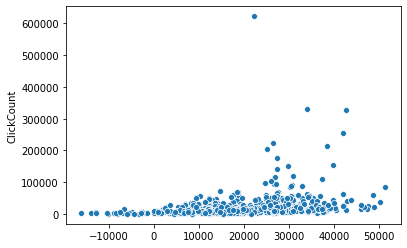

In [15]:
import seaborn as sns
sns.scatterplot(y_pred,y_test)

## What can we do to improve prediction?

MAE: 13879.124503626424
MAPE: 1.7101411813067948


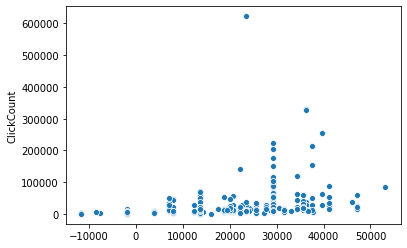

In [16]:
# Feature selection
from sklearn.feature_selection import RFE
selector = RFE(LinearRegression(), 10, step=30)
selector = selector.fit(X_train, y_train)
X_train_filtered = X_train.loc[:,selector.get_support()]
X_test_filtered = X_test.loc[:,selector.get_support()]
lr_filtered = LinearRegression()
lr_filtered.fit(X_train_filtered,y_train)
y_pred_filtered = lr_filtered.predict(X_test_filtered)
print("MAE: %s"%np.mean(np.abs(y_pred_filtered-y_test)))
print("MAPE: %s"%np.mean(np.abs(y_pred_filtered-y_test)/y_test))
sns.scatterplot(y_pred_filtered,y_test)

MAE: 13728.35823831102
MAPE: 1.5988774117130817


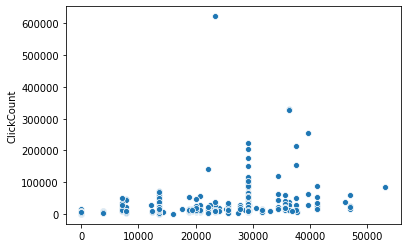

In [17]:
# make prediction always positive
y_pred_adj = y_pred_filtered
y_pred_adj[y_pred_adj<0] = 0

print("MAE: %s"%np.mean(np.abs(y_pred_adj-y_test)))
print("MAPE: %s"%np.mean(np.abs(y_pred_adj-y_test)/y_test))
sns.scatterplot(y_pred_adj,y_test)

## Your turn: do some experiements

In [18]:
# Do your work here

In [19]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [20]:
print("MAE: %s"%np.mean(np.abs(y_pred-y_test)))
print("MAPE: %s"%np.mean(np.abs(y_pred-y_test)/y_test))

MAE: 13985.610851808635
MAPE: 1.846175358530916


## What is a model?
From statistical/probalistic perspective, 

<div>
<img src="./Machine-Learning-Foundations-8-2.png" width="700"/>
</div>





# Reading
[什麼是機器學習](https://www.youtube.com/watch?v=sS4523miLnw&list=PLXVfgk9fNX2I7tB6oIINGBmW50rrmFTqf&index=2)